# Matplotlib

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

1. 1D data is called series data
2. 2D data is called dataframe data
3. 3D and above data is called panel data

In [2]:
Dataset="../Datasets"

**There are 3 type of Data structure in pandas**
1. Series: It is 1D array which assign index to each value.
2. Dataframe: It is 2D array. Its a tabular data structure.
3. Panel: It has 3 dimensional and more dimensional array.

# Read CSV file and creating dataframe

In [3]:
cars_df=pd.read_csv(Dataset+'/cars.csv')

In [4]:
#We can change column name to our requirement

cars_df.columns=['Model','Actual_MPG', 'cylinder','Engine_disp', 'horsepower','weight','accelarate','year','origin']

**Correlation**
```
How factor x1  is co related to x2
```

**Here x2 and x1 is changing in same direction this is called Positive Correlation**
<img src="corr.jpg" width="250"/>
```
Closer its to '1' stronger the positive correlation and in other word its 100% positive correlated
```

**Here x2 and x1 is changing in different direction this is called negative correlation**
<img src="corr2.jpg" width="250"/>
```
Closer its to '-1' stronger the negative correlation and in other word its 100% negative correlated
```

**Here x1 changes but has no effect on x2 this is called No correlation or uncorrelated**
<img src="corr3.jpg" width="250"/>

```Point to remember```
1. Correlation coeficieant can be between +1 and -1
2. If correlation is close to +1 its positive correlated and if its close to -1 its negative correlation and if its 0 then no correlation

```
From below considering "Actual MPG" has strong negative correlation with "weight".
```
```
It means If weight increase Acutal MPG will decrease and vice versa.
```
```
From below considering "Actual MPG" has positive correlation with "Accelerated"/"year".
```
```
It means If Accelerate increase Acutal MPG will increase and vice versa.
```
```
If vehicle is newer Acutal MPG will also increase and vice versa.
```

In [5]:
cars_df_correlation=round(cars_df.corr(),2)

# Covarience Is bit technical need to check later
**cars_df.cov()**

## Groupby

In [6]:
cars_grp_median=round(cars_df.groupby('origin').median())

In [7]:
cars_grp_mean=round(cars_df.groupby('origin').mean())

# Pivot Table Demo

**Summerizing data in table in different bucket.A pivot table allows you to extract the significance from a large, detailed data set.**
```Create a spreadsheet-style pivot table as a DataFrame. The levels in the pivot table will be stored in MultiIndex objects (hierarchical indexes) on the index and columns of the result DataFrame```

In [8]:
car_table1=pd.pivot_table(cars_df,values='Actual_MPG',index=['cylinder','origin'], columns='year',aggfunc=np.median)

In [9]:
car_table2=pd.pivot_table(cars_df,values='Actual_MPG',index=['cylinder'], columns='year',aggfunc=np.median)


In [10]:
car_table3=pd.pivot_table(cars_df,values='Actual_MPG',index=['cylinder'],aggfunc=np.mean)


In [11]:
car_comprehensive_table=pd.pivot_table(cars_df,values=['Actual_MPG','weight'],index=['cylinder','origin'],columns=['year','horsepower'] ,aggfunc=np.mean)

# Matplotlib

## Below is the sample code. 
[Matplotlib](https://matplotlib.org/gallery)

### Cross- and Auto-Correlation Demo

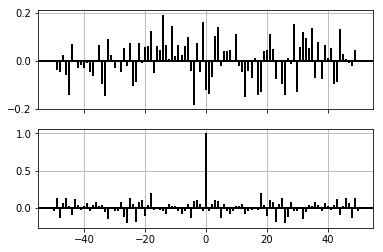

In [16]:
import matplotlib.pyplot as plt
import numpy as np


# Fixing random state for reproducibility
np.random.seed(19680801)


x, y = np.random.randn(2, 100)
fig, [ax1, ax2] = plt.subplots(2, 1, sharex=True)
ax1.xcorr(x, y, usevlines=True, maxlags=50, normed=True, lw=2)
ax1.grid(True)
ax1.axhline(0, color='black', lw=2)

ax2.acorr(x, usevlines=True, normed=True, maxlags=50, lw=2)
ax2.grid(True)
ax2.axhline(0, color='black', lw=2)

plt.show();

### Stacked Bar Graph

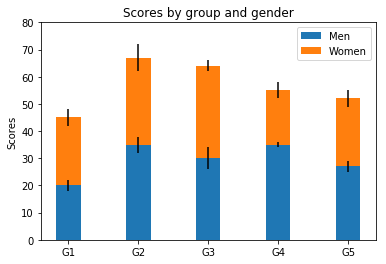

In [17]:
import numpy as np
import matplotlib.pyplot as plt


N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show();

In [19]:
cars_df_correlation

,Actual_MPG,cylinder,Engine_disp,horsepower,weight,accelarate,year
Actual_MPG,1.00,-0.78,-0.81,-0.78,-0.83,0.42,0.58
cylinder,-0.78,1.00,0.95,0.84,0.90,-0.50,-0.35
Engine_disp,-0.81,0.95,1.00,0.90,0.93,-0.54,-0.37
horsepower,-0.78,0.84,0.90,1.00,0.86,-0.69,-0.42
weight,-0.83,0.90,0.93,0.86,1.00,-0.42,-0.31
accelarate,0.42,-0.50,-0.54,-0.69,-0.42,1.00,0.29
year,0.58,-0.35,-0.37,-0.42,-0.31,0.29,1.00


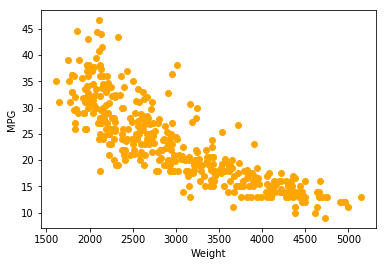

In [30]:
plt.scatter(cars_df.weight, cars_df.Actual_MPG,color='orange')
plt.xlabel ('Weight')
plt.ylabel ('MPG')
plt.show;

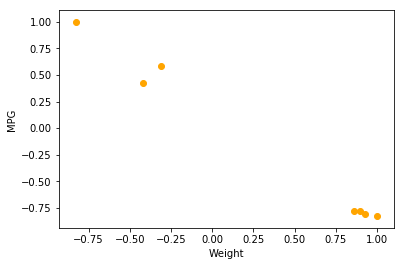

In [29]:
plt.scatter(cars_df_correlation.weight, cars_df_correlation.Actual_MPG,color='orange')
plt.xlabel ('Weight')
plt.ylabel ('MPG')
plt.show;

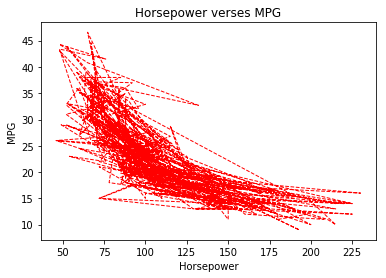

In [34]:
plt.plot(cars_df.horsepower,cars_df.Actual_MPG,'b',linestyle = '--',color='red', linewidth=1)
plt.xlabel ('Horsepower')
plt.ylabel ('MPG')
plt.title('Horsepower verses MPG')
plt.show();